In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# 1)  Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Data Description :

# Undergrad : person is under graduated or not
# Marital.Status : marital status of a person
# Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
# Work Experience : Work experience of an individual person
# Urban : Whether that person belongs to urban area or not

In [3]:
df1=pd.read_csv('Fraud_check.csv')
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df1.shape

(600, 6)

In [5]:
df1.size

3600

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df1.duplicated().any()

False

In [9]:
lab_enc=LabelEncoder()

In [10]:
df1['Marital.Status']=lab_enc.fit_transform(df1['Marital.Status'])
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES
596,YES,0,69967,55369,2,YES
597,NO,0,47334,154058,0,YES
598,YES,1,98592,180083,17,NO


In [11]:
df1 = pd.get_dummies(df1, columns=['Undergrad','Urban'], drop_first=True).astype(int)
df1

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,68833,50047,10,0,1
1,0,33700,134075,18,1,1
2,1,36925,160205,30,0,1
3,2,50190,193264,15,1,1
4,1,81002,27533,28,0,0
...,...,...,...,...,...,...
595,0,76340,39492,7,1,1
596,0,69967,55369,2,1,1
597,0,47334,154058,0,0,1
598,1,98592,180083,17,1,0


In [12]:
df1['Taxable.Income'] = df1['Taxable.Income'].apply(lambda features: 'Risky' if features <= 30000 else 'Good')
df1

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,Good,50047,10,0,1
1,0,Good,134075,18,1,1
2,1,Good,160205,30,0,1
3,2,Good,193264,15,1,1
4,1,Good,27533,28,0,0
...,...,...,...,...,...,...
595,0,Good,39492,7,1,1
596,0,Good,55369,2,1,1
597,0,Good,154058,0,0,1
598,1,Good,180083,17,1,0


In [13]:
df1['Taxable.Income']=lab_enc.fit_transform(df1['Taxable.Income'])
df1

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,0,50047,10,0,1
1,0,0,134075,18,1,1
2,1,0,160205,30,0,1
3,2,0,193264,15,1,1
4,1,0,27533,28,0,0
...,...,...,...,...,...,...
595,0,0,39492,7,1,1
596,0,0,55369,2,1,1
597,0,0,154058,0,0,1
598,1,0,180083,17,1,0


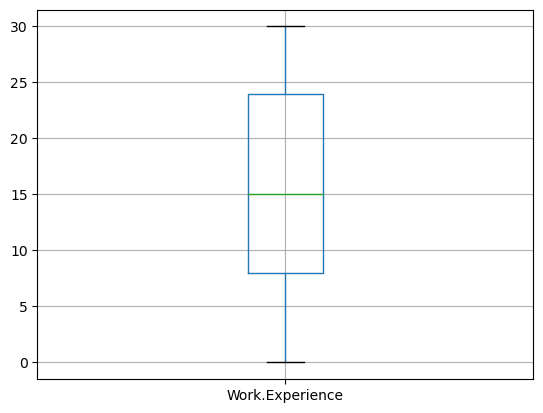

In [14]:
df1.boxplot('Work.Experience')
plt.show()

In [15]:
target1=df1[['Taxable.Income']]
target1

,Taxable.Income
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [16]:
features1=df1.drop('Taxable.Income',axis=1)
features1

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,50047,10,0,1
1,0,134075,18,1,1
2,1,160205,30,0,1
3,2,193264,15,1,1
4,1,27533,28,0,0
...,...,...,...,...,...
595,0,39492,7,1,1
596,0,55369,2,1,1
597,0,154058,0,0,1
598,1,180083,17,1,0


In [17]:
x_train1,x_test1,y_train1,y_test1=train_test_split(features1,target1,train_size=0.75,random_state=25)

In [18]:
x_train1.isnull().sum()

Marital.Status     0
City.Population    0
Work.Experience    0
Undergrad_YES      0
Urban_YES          0
dtype: int64

In [19]:
x_test1.isnull().sum()

Marital.Status     0
City.Population    0
Work.Experience    0
Undergrad_YES      0
Urban_YES          0
dtype: int64

In [20]:
std_sca=StandardScaler()

In [21]:
x_train1=std_sca.fit_transform(x_train1)

In [22]:
x_test1=std_sca.transform(x_test1)

In [23]:
dec_tree1=DecisionTreeClassifier()

In [24]:
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [25]:
grid_search= GridSearchCV(dec_tree1,params)

In [26]:
grid_search.fit(x_train1,y_train1)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [27]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

In [28]:
dec_tree1= DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=4)

In [29]:
dec_tree1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [30]:
y_pred1= dec_tree1.predict(x_test1)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
accuracy_score(y_test1,y_pred1)

0.8066666666666666

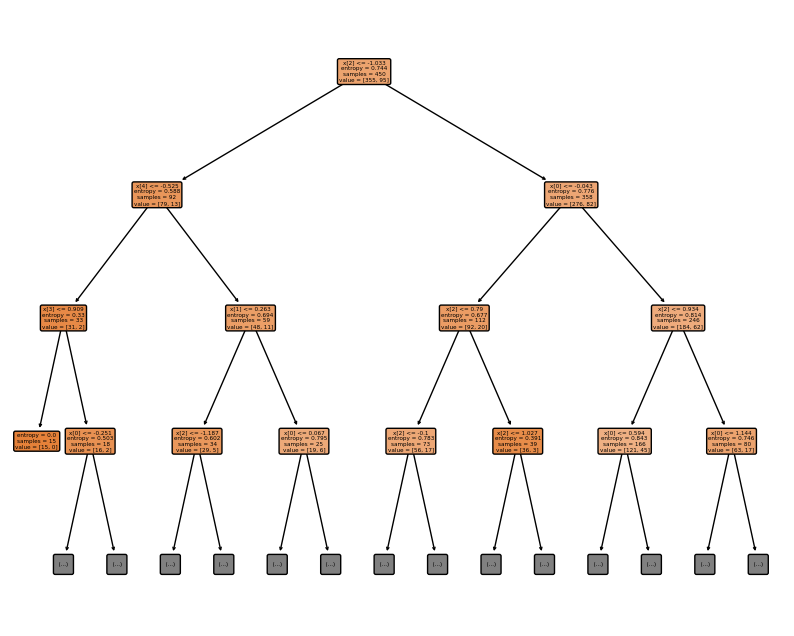

In [32]:
plt.figure(figsize=(10,8))
plot_tree(dec_tree1,filled=True,rounded=True,feature_names=df1.get(features1),max_depth=3)
plt.show()

In [33]:
conf1=confusion_matrix(y_test1,y_pred1)
conf1

array([[121,   0],
       [ 29,   0]], dtype=int64)

In [34]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       121
           1       0.00      0.00      0.00        29

    accuracy                           0.81       150
   macro avg       0.40      0.50      0.45       150
weighted avg       0.65      0.81      0.72       150



C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


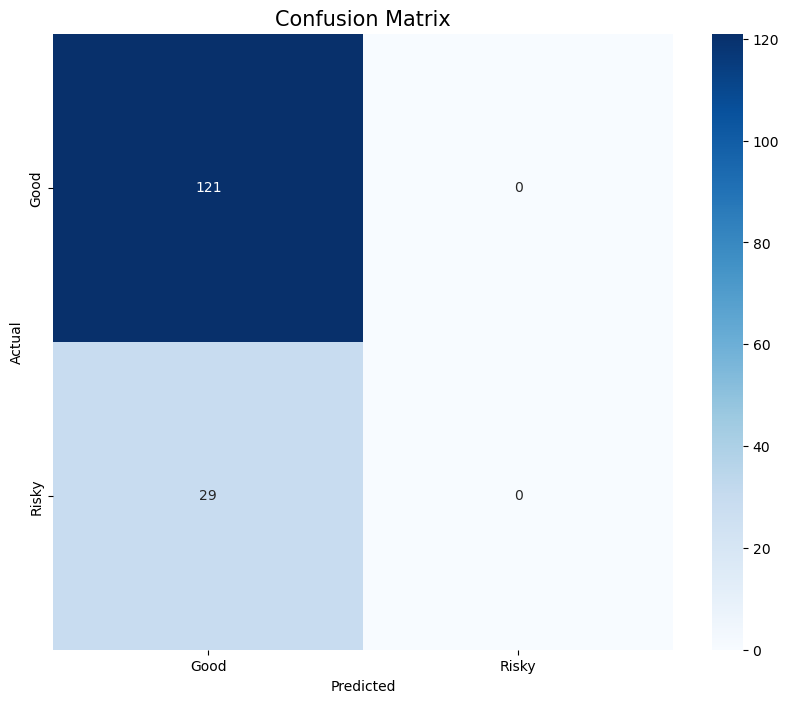

In [35]:
labels = ['Good','Risky']
plt.figure(figsize=(10,8))
sns.heatmap(conf1,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted',size=10)
plt.ylabel('Actual',size=10)
plt.title('Confusion Matrix',size=15)
plt.show()

##### Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
bag_clas1=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50,bootstrap=True)

In [38]:
bag_clas1.fit(x_train1,y_train1)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [39]:
y_pred1=bag_clas1.predict(x_test1)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [40]:
accuracy_score(y_test1,y_pred1)

0.7666666666666667

##### Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
grad_boost1=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=1.0)

In [43]:
grad_boost1.fit(x_train1,y_train1)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [44]:
y_pred1=grad_boost1.predict(x_test1)
y_pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
accuracy_score(y_test1,y_pred1)

0.7733333333333333

### ROC Curve

In [46]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred1)

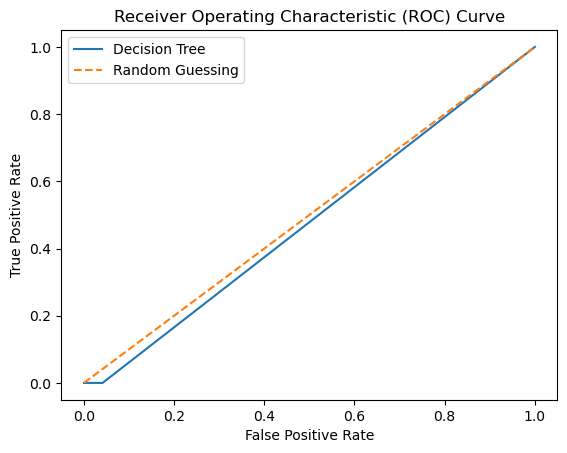

In [47]:
plt.plot(fpr,tpr,label='Decision Tree')
plt.plot([0, 1],[0, 1],'--',label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


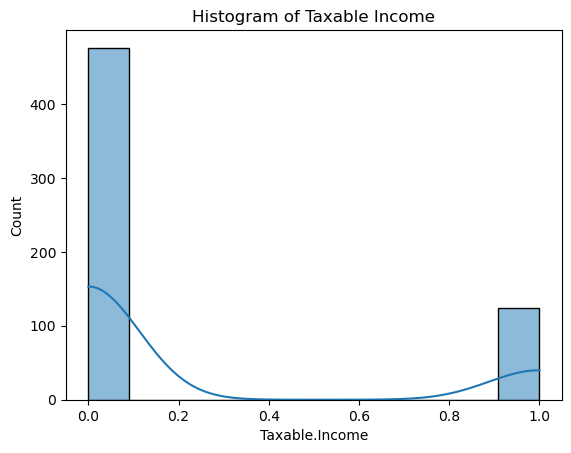

In [48]:
# Histogram
sns.histplot(df1['Taxable.Income'],kde=True)
plt.title('Histogram of Taxable Income')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

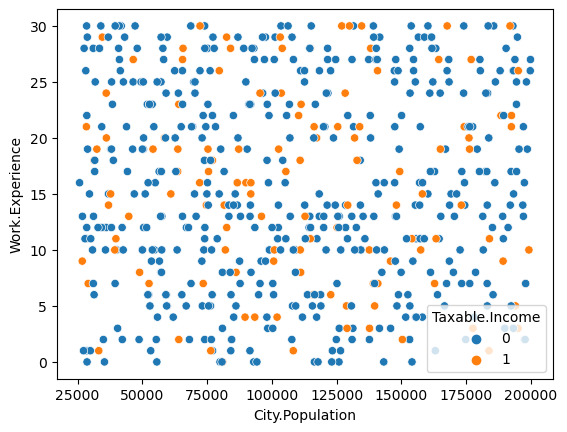

In [49]:
# Scatter plot
sns.scatterplot(data=df1,x='City.Population',y='Work.Experience',hue='Taxable.Income')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

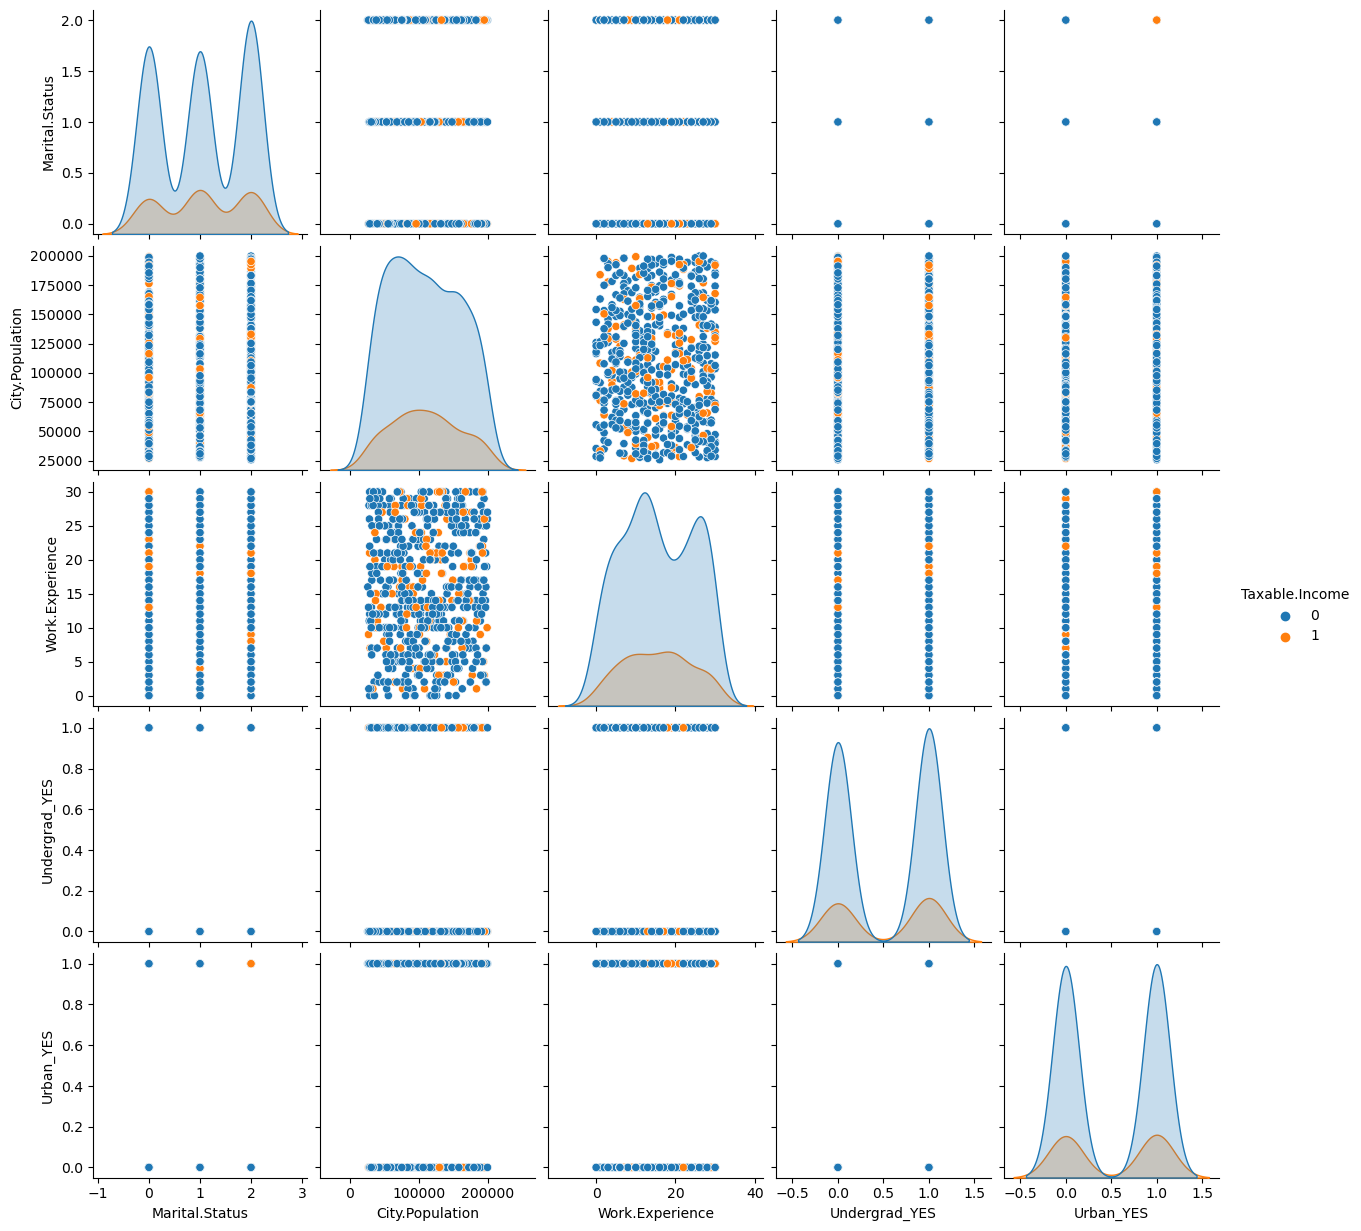

In [50]:
# Pairplot
sns.pairplot(df1,hue='Taxable.Income')
plt.show()

In [51]:
# 2) Decision Tree
 
# Assignment


# About the data: 
# Let’s consider a Company dataset with around 10 variables and 400 records. 
# The attributes are as follows: 
# Sales -- Unit sales (in thousands) at each location
# Competitor Price -- Price charged by competitor at each location
# Income -- Community income level (in thousands of dollars)
# Advertising -- Local advertising budget for company at each location (in thousands of dollars)
# Population -- Population size in region (in thousands)
# Price -- Price company charges for car seats at each site
# Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
# Age -- Average age of the local population
# Education -- Education level at each location
# Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
# US -- A factor with levels No and Yes to indicate whether the store is in the US or not
# The company dataset looks like this: 
 
# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [52]:
df2=pd.read_csv('Company_Data.csv')
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [53]:
df2.shape

(400, 11)

In [54]:
df2.size

4400

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [56]:
df2.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [57]:
df2.duplicated().any()

False

In [58]:
lab_enc=LabelEncoder()

In [59]:
df2['ShelveLoc']=lab_enc.fit_transform(df2['ShelveLoc'])
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [60]:
df2 = pd.get_dummies(df2, columns=['Urban','US'], drop_first=True).astype(int)
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9,138,73,11,276,120,0,42,17,1,1
1,11,111,48,16,260,83,1,65,10,1,1
2,10,113,35,10,269,80,2,59,12,1,1
3,7,117,100,4,466,97,2,55,14,1,1
4,4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12,138,108,17,203,128,1,33,14,1,1
396,6,139,23,3,37,120,2,55,11,0,1
397,7,162,26,12,368,159,2,40,18,1,1
398,5,100,79,7,284,95,0,50,12,1,1


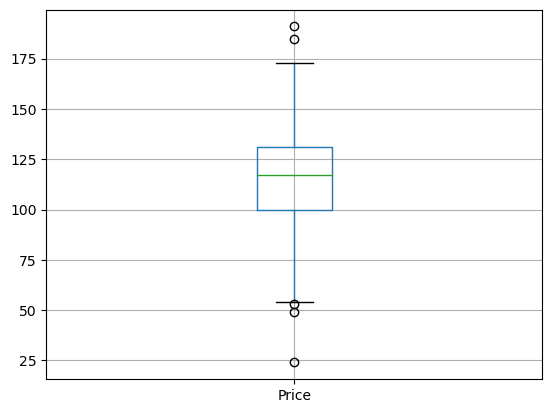

In [61]:
df2.boxplot('Price')
plt.show()

In [62]:
Q3=df2['Price'].quantile(0.75)
Q3

131.0

In [63]:
Q1=df2['Price'].quantile(0.25)
Q1

100.0

In [64]:
IQR=Q3-Q1
IQR

31.0

In [65]:
lower_extreme= Q1-1.5*IQR
lower_extreme

53.5

In [66]:
upper_extreme= Q3+1.5*IQR
upper_extreme

177.5

In [67]:
df2_outliers= df2[(df2['Price']<lower_extreme) | (df2['Price']>upper_extreme)]
df2_outliers

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
42,10,77,69,0,25,24,2,50,18,1,0
125,9,89,78,0,181,49,2,43,15,0,0
165,0,147,58,7,100,191,0,27,15,1,1
174,0,139,24,0,358,185,2,79,15,0,0
367,14,95,106,0,256,53,1,52,17,1,0


In [68]:
df2_no_outliers= df2[(df2['Price']>lower_extreme) & (df2['Price']<upper_extreme)]
df2_no_outliers

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9,138,73,11,276,120,0,42,17,1,1
1,11,111,48,16,260,83,1,65,10,1,1
2,10,113,35,10,269,80,2,59,12,1,1
3,7,117,100,4,466,97,2,55,14,1,1
4,4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12,138,108,17,203,128,1,33,14,1,1
396,6,139,23,3,37,120,2,55,11,0,1
397,7,162,26,12,368,159,2,40,18,1,1
398,5,100,79,7,284,95,0,50,12,1,1


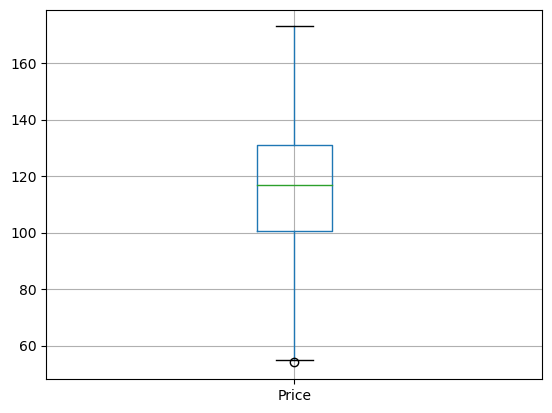

In [69]:
df2_no_outliers.boxplot('Price')
plt.show()

In [70]:
target2=df2_no_outliers[['Sales']]
target2

,Sales
0,9
1,11
2,10
3,7
4,4
...,...
395,12
396,6
397,7
398,5


In [71]:
features2=df2_no_outliers.drop('Sales',axis=1)
features2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [72]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,target2,train_size=0.75,random_state=20)

In [73]:
x_train2.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban_Yes      0
US_Yes         0
dtype: int64

In [74]:
x_test2.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban_Yes      0
US_Yes         0
dtype: int64

In [75]:
std_sca=StandardScaler()

In [76]:
x_train2=std_sca.fit_transform(x_train2)

In [77]:
x_test2=std_sca.transform(x_test2)

In [78]:
dec_tree2=DecisionTreeClassifier()

In [79]:
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [80]:
grid_search= GridSearchCV(dec_tree2,params)

In [81]:
grid_search.fit(x_train2,y_train2)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [82]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}

In [83]:
dec_tree2= DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=4)

In [84]:
dec_tree2.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [85]:
y_pred2= dec_tree2.predict(x_test2)
y_pred2

array([ 4,  4, 11,  4,  9,  6,  6,  8, 12,  9,  4, 10,  6,  8,  4,  6,  8,
        6,  9,  6,  6,  6,  8,  8,  9,  9,  9,  4,  8,  7,  4,  5,  6,  4,
       10,  8,  8,  9, 12,  9,  8,  6,  8,  8,  8,  1,  4,  6,  4,  9,  9,
        4,  8,  9, 11,  6,  6,  9,  9,  6,  8,  8,  8,  8,  8,  5,  6,  5,
       10, 11,  7,  8,  9,  4,  9,  6,  6,  8,  4,  9,  6,  6,  7,  7,  6,
        6,  6,  6,  4,  6,  6,  8,  8, 11,  6, 11,  4, 11,  6])

In [86]:
accuracy_score(y_test2,y_pred2)

0.1717171717171717

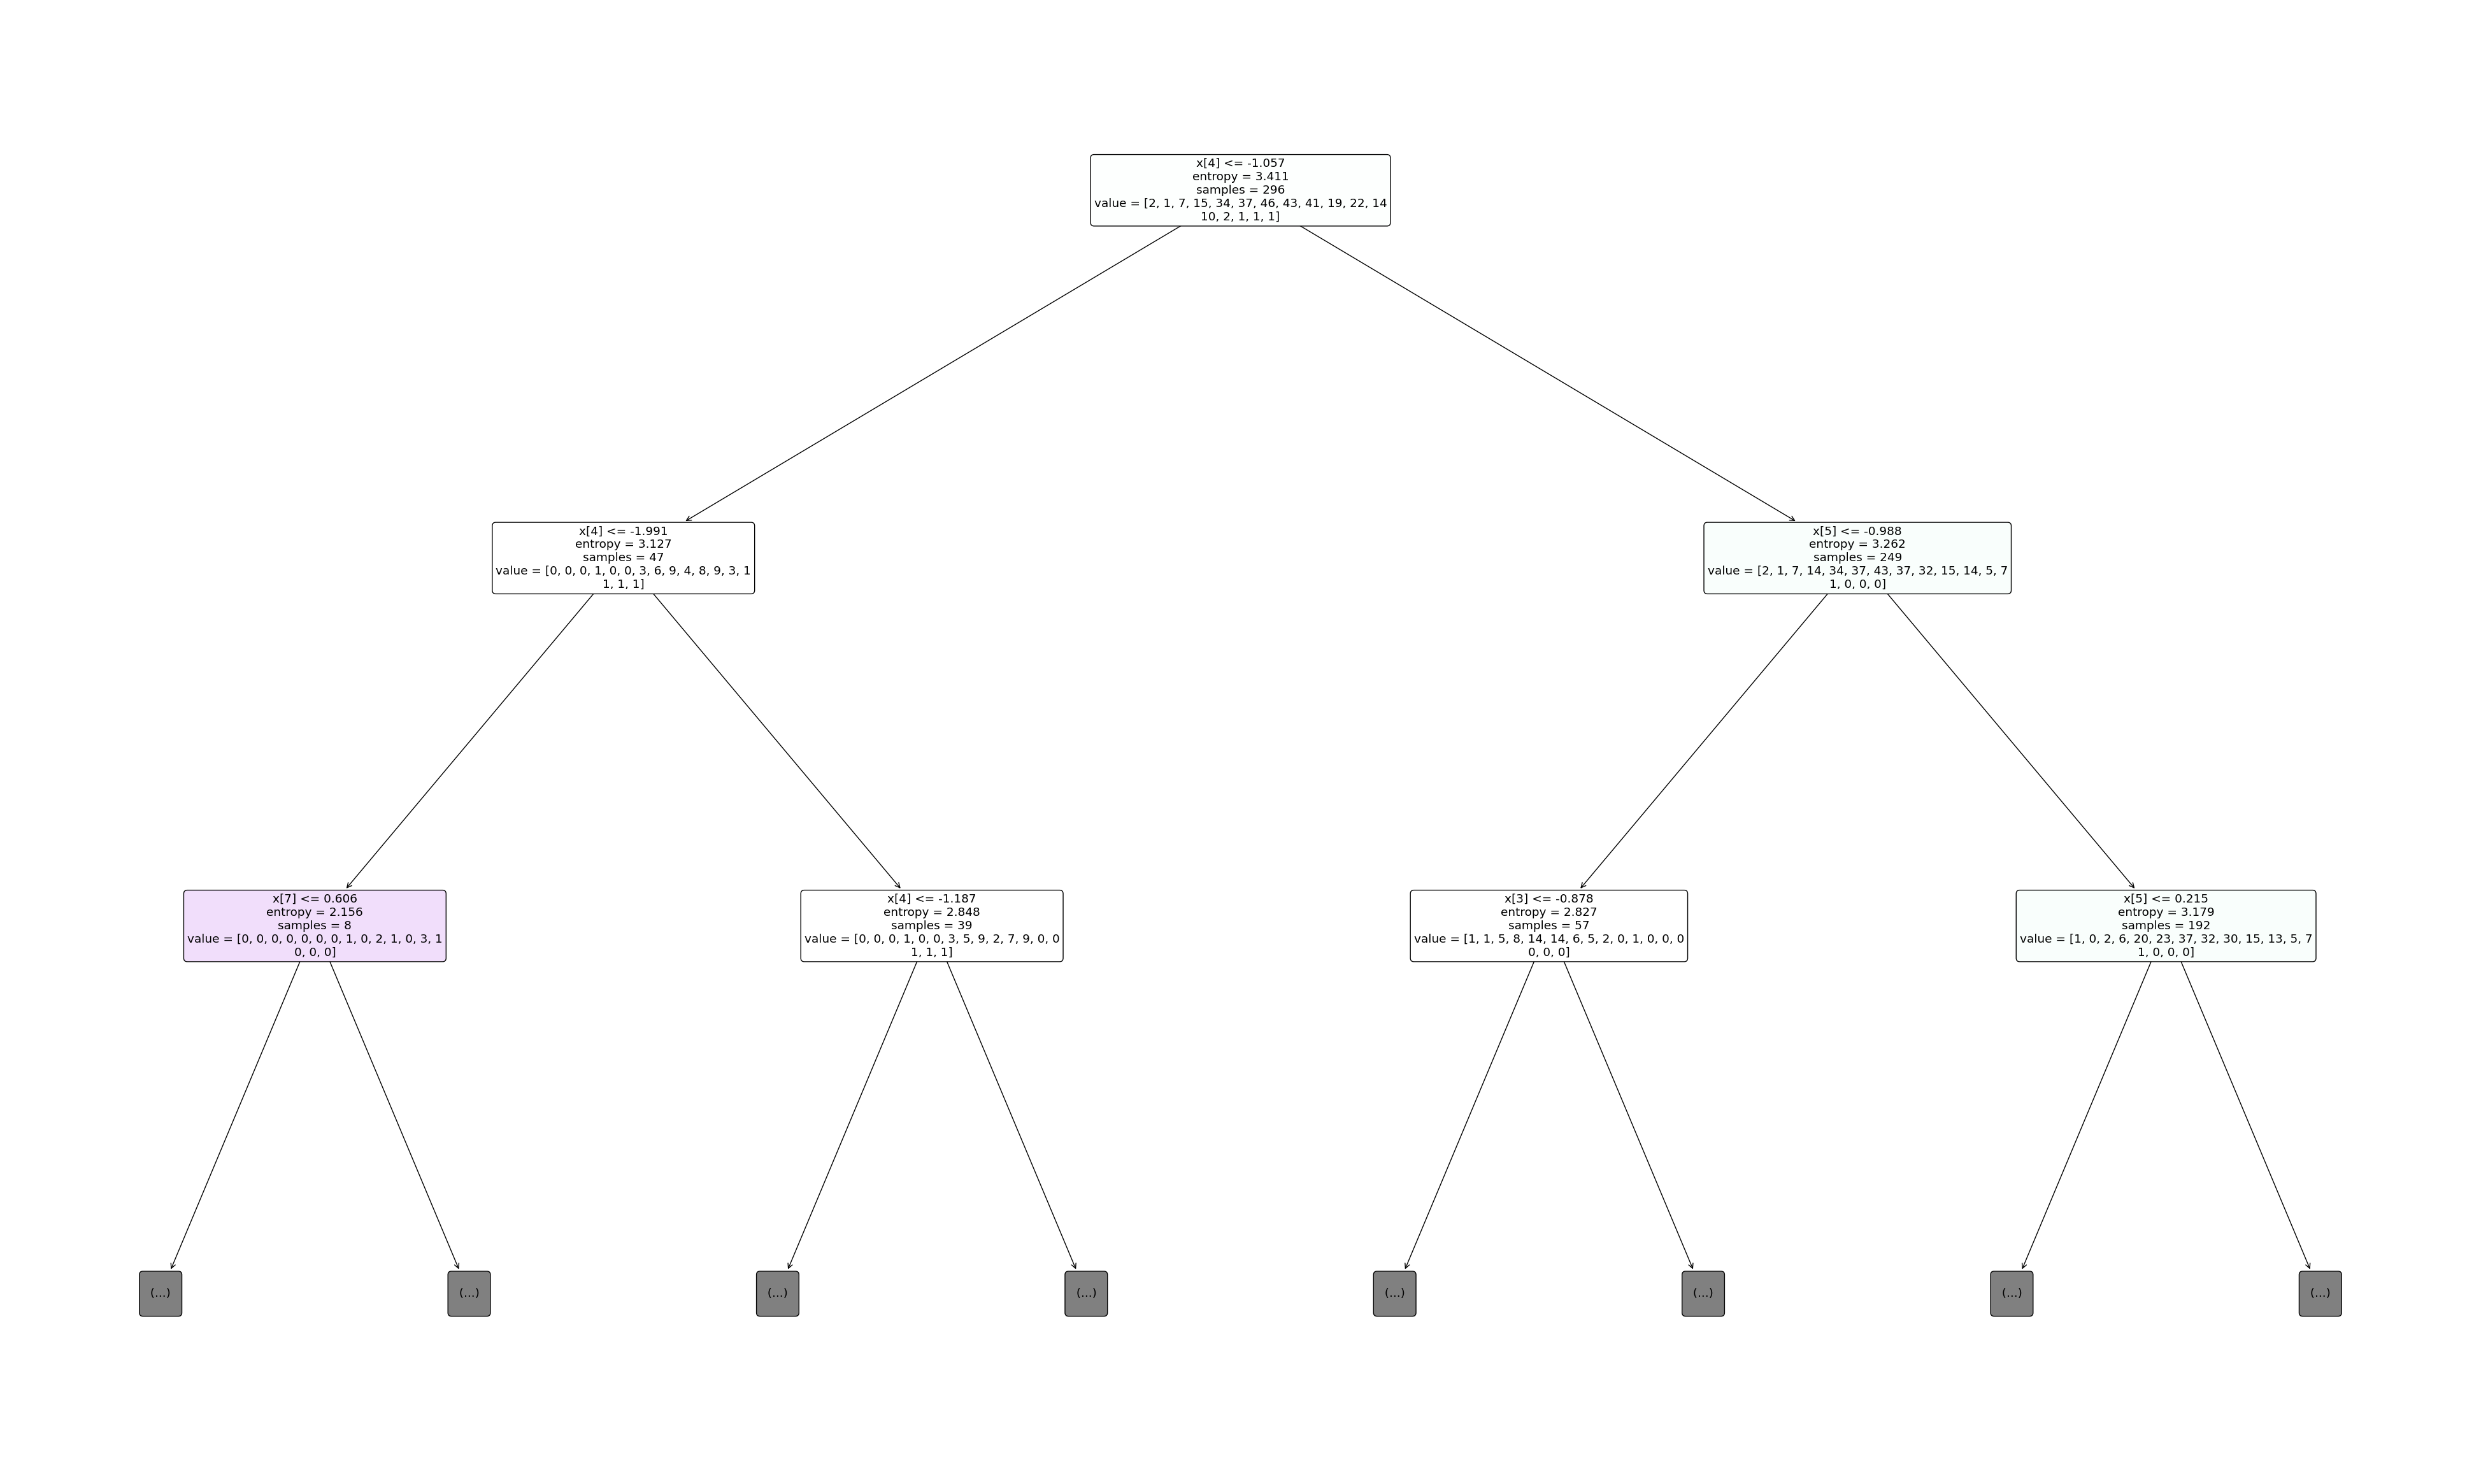

In [87]:
plt.figure(figsize=(50,30))
plot_tree(dec_tree2,filled=True,rounded=True,feature_names=df2_no_outliers.get(features2),max_depth=2)
plt.show()

In [88]:
conf2=confusion_matrix(y_test2,y_pred2)
conf2

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 3, 1, 8, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 4, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 4, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 2, 0, 5, 1, 3, 2, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0]], dtype=int64)

In [89]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.13      0.29      0.18         7
           5       0.33      0.06      0.11        16
           6       0.15      0.50      0.23         8
           7       0.25      0.11      0.15         9
           8       0.18      0.44      0.26         9
           9       0.12      0.13      0.13        15
          10       0.33      0.14      0.20         7
          11       0.33      0.25      0.29         8
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         5

    accuracy                           0.17        99
   macro avg       0.13      0.14      0.11        99
weighted avg       0.18      0.17      0.14        99



C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


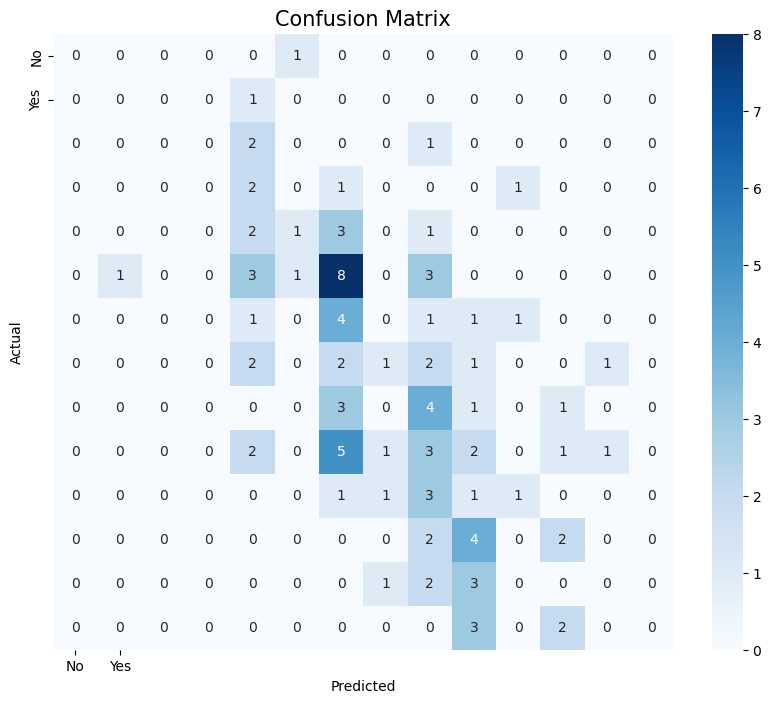

In [90]:
labels = ['No','Yes']
plt.figure(figsize=(10,8))
sns.heatmap(conf2,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted',size=10)
plt.ylabel('Actual',size=10)
plt.title('Confusion Matrix',size=15)
plt.show()

##### Bagging

In [91]:
from sklearn.ensemble import BaggingClassifier

In [92]:
bag_clas2= BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50,bootstrap=True)

In [93]:
bag_clas2.fit(x_train2,y_train2)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [94]:
y_pred2=bag_clas2.predict(x_test2)
y_pred2

array([ 5,  3, 10,  3,  6,  8,  6,  7,  9, 12,  8, 11,  6,  7,  6,  3,  6,
        4,  5,  6,  8,  5,  8,  9,  9,  8,  5,  4,  8,  7,  4,  5, 10,  4,
        9, 10,  6,  8,  7, 12,  8,  6, 10,  6,  4,  6,  4,  6,  4,  8, 10,
        5,  6,  6, 10,  6,  5, 10,  6,  8,  6,  8,  9,  7,  8,  3,  4,  5,
       10,  7,  8,  6,  8,  3,  6,  6,  5,  6,  5,  9,  6,  8,  8,  7,  6,
        8,  7,  5,  5,  7,  6,  8, 10,  7,  6,  7,  5, 11,  7])

In [95]:
accuracy_score(y_test2,y_pred2)

0.1414141414141414

##### Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
grad_boost2=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=1.0)

In [98]:
grad_boost2.fit(x_train2,y_train2)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [99]:
y_pred2=grad_boost2.predict(x_test2)
y_pred2

array([ 5,  5,  6,  4,  9,  7,  6,  7,  4,  6,  7,  8,  7,  7,  5, 13,  6,
        4,  9,  6,  7,  5,  7,  9,  9,  9,  5, 10,  8,  7,  4,  5,  8,  4,
       14, 10,  6, 10, 15, 10,  7,  6, 12,  7,  5,  5,  6,  6,  8,  6,  8,
        5,  6, 10, 10,  8,  8,  8,  7,  8,  8, 12,  9,  8,  6,  5,  6,  5,
        6,  8,  8,  8,  9,  3,  8,  6,  5,  6,  5,  6,  6,  6,  8, 10,  7,
        8,  7,  5,  5,  6,  6,  9, 10,  9,  6,  7,  7, 11,  6])

In [100]:
accuracy_score(y_test2,y_pred2)

0.1717171717171717

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


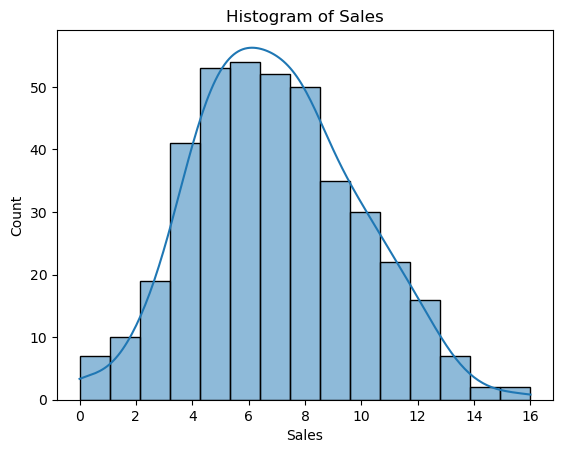

In [101]:
# Histogram
sns.histplot(df2['Sales'],kde=True)
plt.title('Histogram of Sales')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


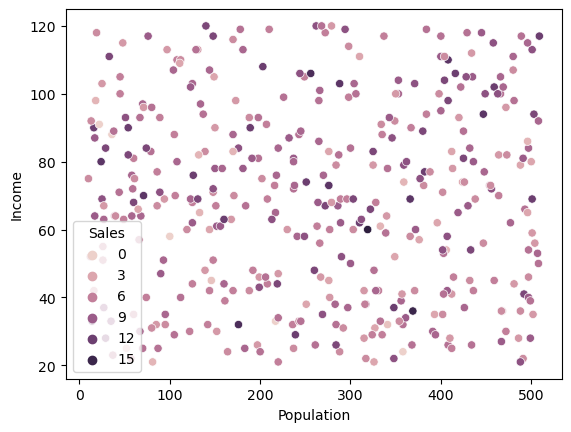

In [102]:
# Scatter plot
sns.scatterplot(data=df2,x='Population',y='Income',hue='Sales')
plt.show()

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

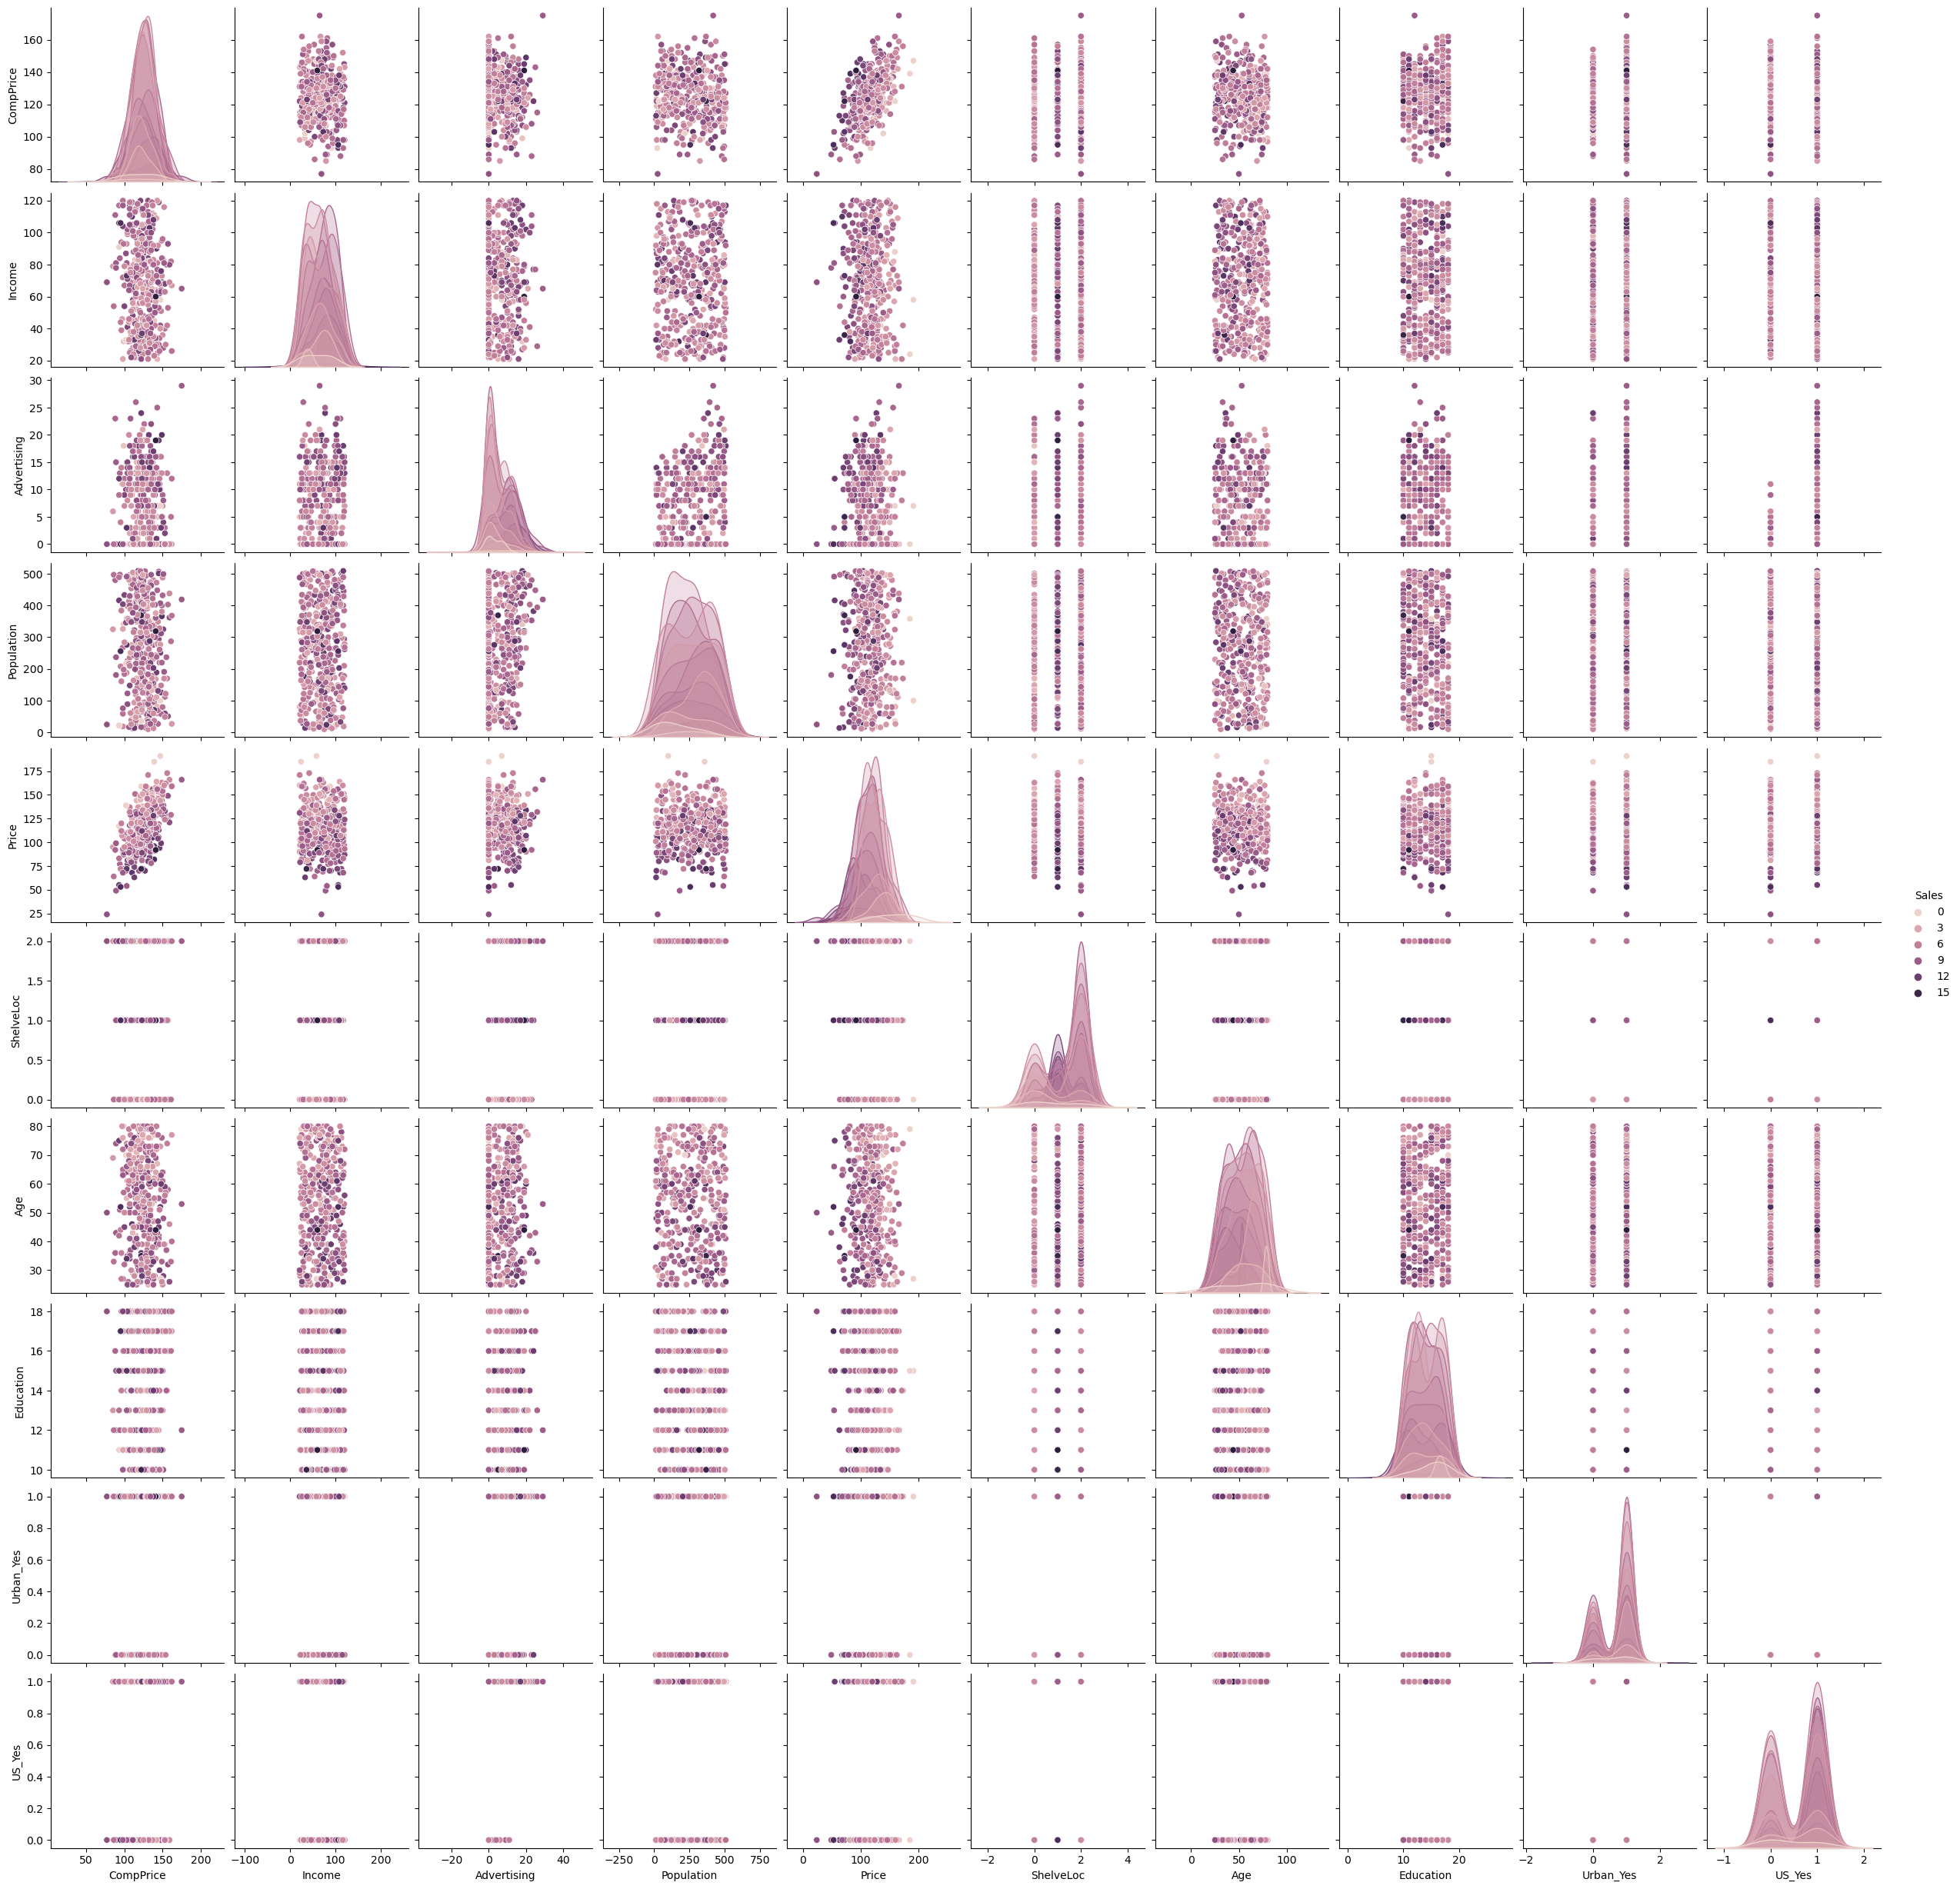

In [103]:
# Pairplot
sns.pairplot(df2,hue='Sales')
plt.show()